In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
import warnings

In [11]:
df = pd.read_csv('garments_worker_productivity.csv')
df.head

<bound method NDFrame.head of            date   quarter  department        day  team  targeted_productivity  \
0      1/1/2015  Quarter1      sweing   Thursday     8                   0.80   
1      1/1/2015  Quarter1  finishing    Thursday     1                   0.75   
2      1/1/2015  Quarter1      sweing   Thursday    11                   0.80   
3      1/1/2015  Quarter1      sweing   Thursday    12                   0.80   
4      1/1/2015  Quarter1      sweing   Thursday     6                   0.80   
...         ...       ...         ...        ...   ...                    ...   
1192  3/11/2015  Quarter2   finishing  Wednesday    10                   0.75   
1193  3/11/2015  Quarter2   finishing  Wednesday     8                   0.70   
1194  3/11/2015  Quarter2   finishing  Wednesday     7                   0.65   
1195  3/11/2015  Quarter2   finishing  Wednesday     9                   0.75   
1196  3/11/2015  Quarter2   finishing  Wednesday     6                   0.70  

In [12]:

null_counts = df.isnull().sum()

print("Columns with null values:")
print(null_counts)

Columns with null values:
date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64


In [13]:
df= df.drop(columns=["date"])
df.replace({'department': {'finishing ': 'finishing'}}, inplace=True)
df.replace({'department': {'sweing': 'sewing'}}, inplace=True)
df

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [14]:
df['day'].unique()

array(['Thursday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
      dtype=object)

In [15]:
label_encoder = LabelEncoder()

df[['quarter', 'department', 'day']] = df[['quarter', 'department', 'day']].apply(label_encoder.fit_transform)

df.fillna(df.median(), inplace=True)
col = df.pop('targeted_productivity')
df.insert(12 , 'targeted_productivity' , col)

df

,quarter,department,day,team,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,targeted_productivity,actual_productivity
0,0,1,3,8,26.16,1108.0,7080,98,0.0,0,0,59.0,0.80,0.940725
1,0,0,3,1,3.94,1039.0,960,0,0.0,0,0,8.0,0.75,0.886500
2,0,1,3,11,11.41,968.0,3660,50,0.0,0,0,30.5,0.80,0.800570
3,0,1,3,12,11.41,968.0,3660,50,0.0,0,0,30.5,0.80,0.800570
4,0,1,3,6,25.90,1170.0,1920,50,0.0,0,0,56.0,0.80,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,1,0,5,10,2.90,1039.0,960,0,0.0,0,0,8.0,0.75,0.628333
1193,1,0,5,8,3.90,1039.0,960,0,0.0,0,0,8.0,0.70,0.625625
1194,1,0,5,7,3.90,1039.0,960,0,0.0,0,0,8.0,0.65,0.625625
1195,1,0,5,9,2.90,1039.0,1800,0,0.0,0,0,15.0,0.75,0.505889


In [16]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [17]:
x 

,quarter,department,day,team,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,targeted_productivity
0,0,1,3,8,26.16,1108.0,7080,98,0.0,0,0,59.0,0.80
1,0,0,3,1,3.94,1039.0,960,0,0.0,0,0,8.0,0.75
2,0,1,3,11,11.41,968.0,3660,50,0.0,0,0,30.5,0.80
3,0,1,3,12,11.41,968.0,3660,50,0.0,0,0,30.5,0.80
4,0,1,3,6,25.90,1170.0,1920,50,0.0,0,0,56.0,0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,1,0,5,10,2.90,1039.0,960,0,0.0,0,0,8.0,0.75
1193,1,0,5,8,3.90,1039.0,960,0,0.0,0,0,8.0,0.70
1194,1,0,5,7,3.90,1039.0,960,0,0.0,0,0,8.0,0.65
1195,1,0,5,9,2.90,1039.0,1800,0,0.0,0,0,15.0,0.75


In [18]:
sc = StandardScaler()

x = sc.fit_transform(x)
x

array([[-1.15168784,  0.85572897,  0.27151595, ..., -0.3516175 ,
         1.0992288 ,  0.71913683],
       [-1.15168784, -1.1685943 ,  0.27151595, ..., -0.3516175 ,
        -1.19926822,  0.20815097],
       [-1.15168784,  0.85572897,  0.27151595, ..., -0.3516175 ,
        -0.18522542,  0.71913683],
       ...,
       [-0.32866077, -1.1685943 ,  1.43849833, ..., -0.3516175 ,
        -1.19926822, -0.81382076],
       [-0.32866077, -1.1685943 ,  1.43849833, ..., -0.3516175 ,
        -0.88378824,  0.20815097],
       [-0.32866077, -1.1685943 ,  1.43849833, ..., -0.3516175 ,
        -1.28940536, -0.3028349 ]])

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_test

array([[ 1.31739337,  0.85572897,  0.85500714, ...,  1.98663886,
         0.33306313, -1.32480663],
       [ 0.4943663 ,  0.85572897, -1.47895762, ..., -0.3516175 ,
        -0.16269113,  0.71913683],
       [-1.15168784, -1.1685943 ,  0.85500714, ..., -0.3516175 ,
        -1.19926822,  0.71913683],
       ...,
       [-1.15168784, -1.1685943 ,  0.27151595, ..., -0.3516175 ,
        -1.19926822, -1.32480663],
       [-1.15168784, -1.1685943 , -0.89546643, ..., -0.3516175 ,
        -1.10913108, -0.3028349 ],
       [ 1.31739337,  0.85572897, -0.31197524, ...,  1.98663886,
         1.0992288 ,  0.71913683]])

In [20]:
regressor_lr = LinearRegression()

regressor_lr.fit(x_train, y_train)

y_pred = regressor_lr.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse_lr =np.sqrt(mse)
print(f"Linear Regression - Root Mean Squared Error: {rmse_lr}")

mse_train = mean_squared_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)
print(f"Linear Regression - R^2 Score: {r2_lr}")

Linear Regression - Root Mean Squared Error: 0.14607218107119907
Linear Regression - R^2 Score: 0.1964180779997876


In [21]:
dt = DecisionTreeRegressor()

param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 
                  'poisson', 'absolute_error'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2', 0.5, 1],
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

dtr = grid_search.best_estimator_
y_pred = dtr.predict(x_test)
r2_dtr = r2_score(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

rmse_dtr =np.sqrt(mse)
print(f"DecisionTreeRegressor - Root Mean Squared Error: {rmse_dtr}")
print(f"DecisionTreeRegressor - R^2 Score: {r2_dtr}")

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
Best Parameters: {'criterion': 'poisson', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}
Best Score: 0.37868296429998766
DecisionTreeRegressor - Root Mean Squared Error: 0.12304233297204614
DecisionTreeRegressor - R^2 Score: 0.42983015571317107


In [22]:
rfr = RandomForestRegressor()

param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_features': [ 'sqrt', 'log2', None],  
    'max_depth': [None, 10, 20, 30], 
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],    
    'bootstrap': [True, False]        
}

grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)

grid_search.fit(x_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

rf = grid_search.best_estimator_
y_pred = rf.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

rmse_rf =np.sqrt(mse)
print(f"RandomForestRegressor - Root Mean Squared Error: {rmse_rf}")
print(f"RandomForestRegressor - R^2 Score: {r2_rf}")
warnings.filterwarnings('ignore')

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best parameters found:  {'bootstrap': False, 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Best cross-validation score:  0.5066108343999003
RandomForestRegressor - Root Mean Squared Error: 0.11039854089342105
RandomForestRegressor - R^2 Score: 0.5409903701204415


In [23]:
gb = GradientBoostingRegressor()

param_grid = {
    'n_estimators': [100, 200, 300],         
    'learning_rate': [0.001, 0.01, 0.05],      
    'max_depth': [3, 4, 5, 6],               
    'min_samples_split': [2, 5, 10],         
    'min_samples_leaf': [1, 2, 4],
    'max_features': [ 'sqrt', 'log2'] 
}


grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)


gbr = grid_search.best_estimator_
y_pred = gbr.predict(x_test)

mse = mean_squared_error(y_test, y_pred)

rmse_gbr =np.sqrt(mse)
print(f"GradientBoostingRegressor - Root Mean Squared Error: {rmse_gbr}")

r2_gbr = r2_score(y_test, y_pred)
print(f"GradientBoostingRegressor - R^2 Score: {r2_gbr}")
warnings.filterwarnings('ignore')

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best parameters found:  {'learning_rate': 0.05, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score:  0.5236427688291366
GradientBoostingRegressor - Root Mean Squared Error: 0.11648371721642657
GradientBoostingRegressor - R^2 Score: 0.48899450209319395


In [24]:
xg = XGBRegressor(objective='reg:squarederror')


param_grid = {
    'n_estimators': [100, 200, 300],         
    'learning_rate': [0.001, 0.0, 0.1],      
    'max_depth': [3, 4, 5, 6],               
    'min_child_weight': [1, 3, 5],           
    'subsample': [0.6, 0.8, 1.0],            
    'colsample_bytree': [0.6, 0.8, 1.0]
}


grid_search = GridSearchCV(estimator=xg, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)


xgb = grid_search.best_estimator_
y_pred = xgb.predict(x_test)

mse = mean_squared_error(y_test, y_pred)

rmse_xgb =np.sqrt(mse)
print(f"XGBRegressor - Root Mean Squared Error: {rmse_xgb}")

r2_xgb = r2_score(y_test, y_pred)
print(f"XGBRegressor - R^2 Score: {r2_xgb}")
warnings.filterwarnings('ignore')

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Best parameters found:  {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.8}
Best cross-validation score:  0.5135867548539967
XGBRegressor - Root Mean Squared Error: 0.11716056848197681
XGBRegressor - R^2 Score: 0.4830386550037017


In [25]:
ada_boost = AdaBoostRegressor(random_state=42)

param_grid = {
    'n_estimators': [10 ,50, 100, 200, 300],  
    'learning_rate': [0.001,0.01, 0.1, 1.0] 
}

grid_search = GridSearchCV(estimator=ada_boost, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train, y_train)

abr = grid_search.best_estimator_
y_pred = abr.predict(x_test)
r2_abr = r2_score(y_test, y_pred)

print(f'Best Parameters: {grid_search.best_params_}')

mse = mean_squared_error(y_test, y_pred)
rmse_abr = np.sqrt(mse)
print(f'AdaBoostRegressor - Root Mean Squared Error: {rmse_abr}')
print(f"AdaBoostRegressor - R^2 Score: {r2_abr}")

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 50}
AdaBoostRegressor - Root Mean Squared Error: 0.12741167428022274
AdaBoostRegressor - R^2 Score: 0.3886166948577655


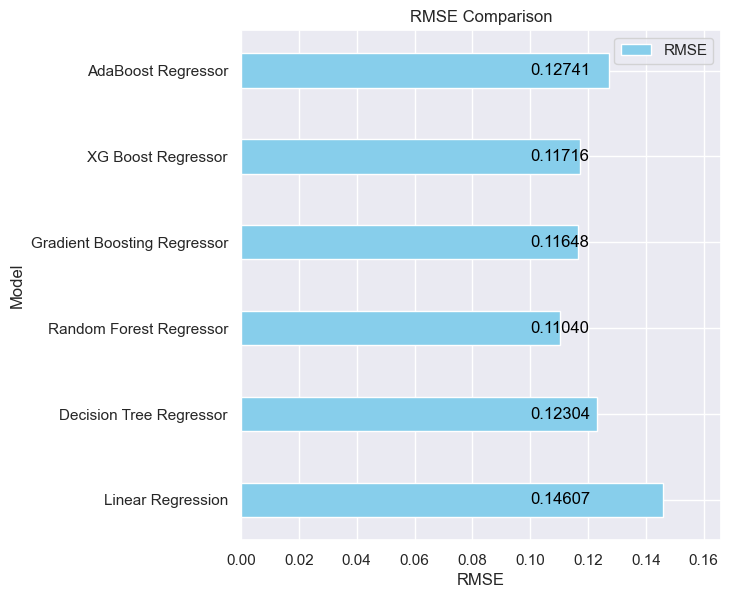

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

models = ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 
          'Gradient Boosting Regressor', 'XG Boost Regressor', 'AdaBoost Regressor']

rmse = [rmse_lr , rmse_dtr , rmse_rf , rmse_gbr , rmse_xgb , rmse_abr]  

fig, ax = plt.subplots(figsize=(8, 6))

bar_height = 0.4

bars = ax.barh(models, rmse, height=bar_height, color="skyblue",label="RMSE")

# Adding labels inside each bar
for bar in bars:
    ax.text( 0.1, bar.get_y() + bar.get_height() / 2,
            f'{bar.get_width():.5f}', ha='left', va='center', color='black')

plt.subplots_adjust(left=0.3, right=0.9, top=0.95, bottom=0.1)

ax.set_xlim(right=max(rmse) + 0.02) 
ax.set_xlabel('RMSE')
ax.set_ylabel('Model')
ax.set_title('RMSE Comparison')
plt.legend()

plt.show()


In [27]:
pickle.dump(rf, open('productivity.pkl', 'wb'))